<a href="https://colab.research.google.com/github/dawood5253/Stock_Market-Analysis/blob/main/Xenalytics_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Analysis : Xenalytics

## Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Datasets

In [ ]:
lumina = pd.read_csv("/content/drive/MyDrive/Xenalytics /Lumina.csv", parse_dates=['Date'],index_col=["Date"])
nexus = pd.read_csv("/content/drive/MyDrive/Xenalytics /Nexus.csv",parse_dates=['Date'],index_col=["Date"])
quantumize = pd.read_csv("/content/drive/MyDrive/Xenalytics /Quantumize.csv",parse_dates=['Date'],index_col=["Date"])
synthify = pd.read_csv("/content/drive/MyDrive/Xenalytics /Synthify.csv",parse_dates=['Date'],index_col=["Date"])
zenith = pd.read_csv("/content/drive/MyDrive/Xenalytics /Zenith.csv",parse_dates=['Date'],index_col=["Date"])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lumina.tail()

,Stock_Price
Date,
2024-02-11,82
2024-02-12,79
2024-02-13,82
2024-02-14,85
2024-02-15,88


In [ ]:
lumina.dtypes

Stock_Price    int64
dtype: object

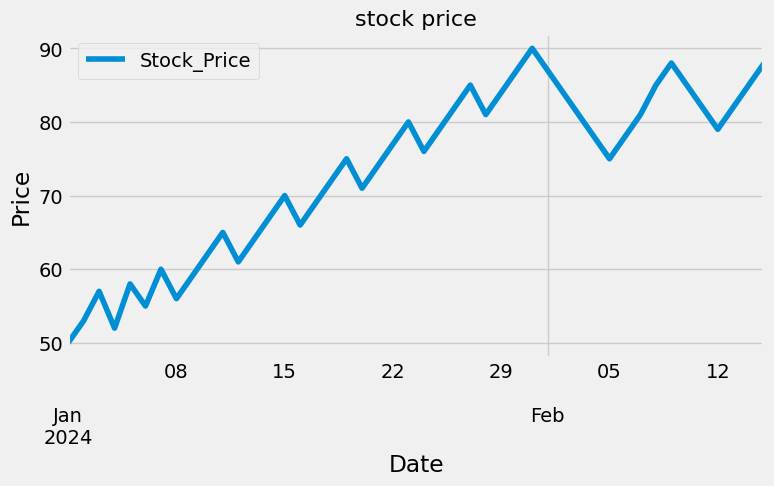

In [ ]:
plt.style.use('fivethirtyeight')
lumina.plot(figsize=(8,4))
plt.ylabel("Price")
plt.title("stock price", fontsize=16)
plt.legend(fontsize=14);

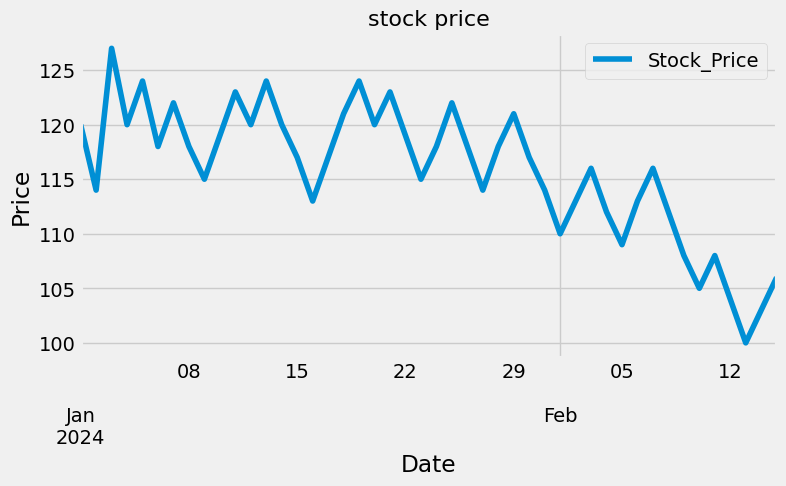

In [ ]:
nexus.plot(figsize=(8 ,4))
plt.ylabel("Price")
plt.title("stock price", fontsize=16)
plt.legend(fontsize=14);

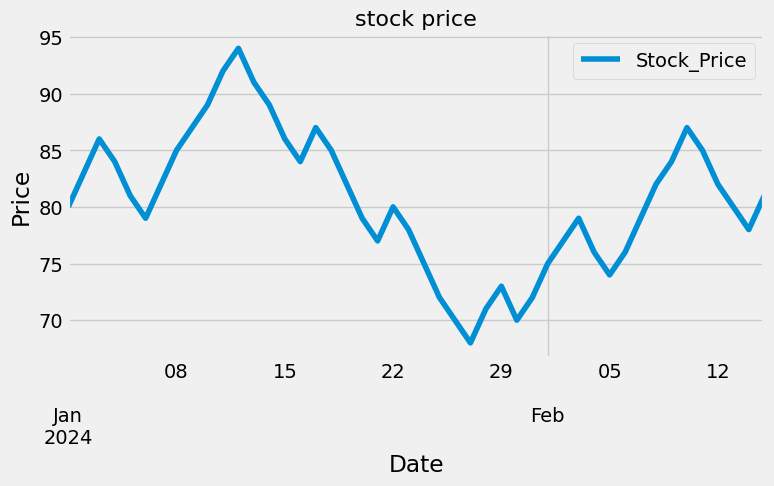

In [ ]:
quantumize.plot(figsize=(8, 4))
plt.ylabel("Price")
plt.title("stock price", fontsize=16)
plt.legend(fontsize=14);

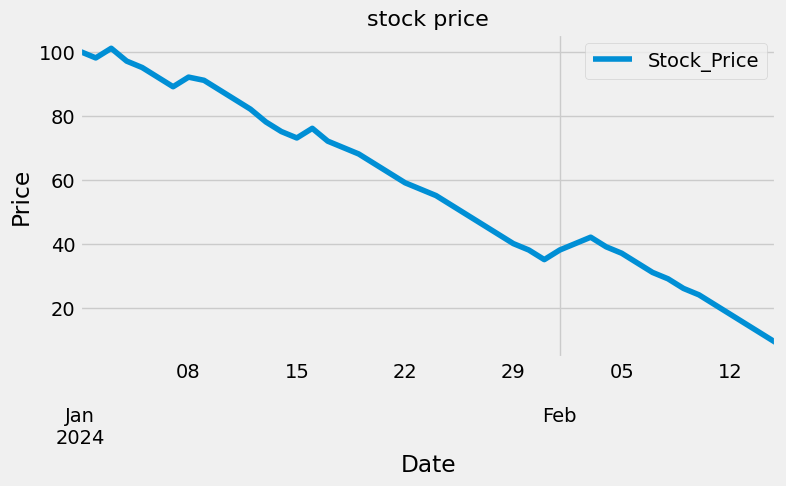

In [ ]:
zenith.plot(figsize=(8, 4))
plt.ylabel("Price")
plt.title("stock price", fontsize=16)
plt.legend(fontsize=14);

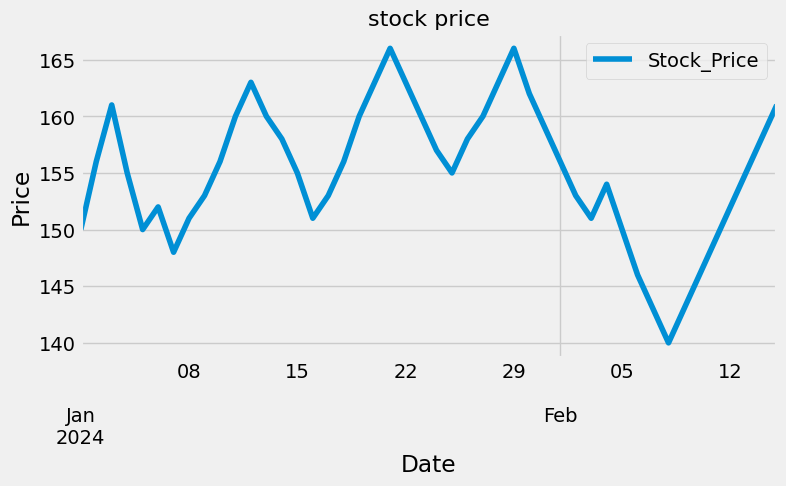

In [ ]:
synthify.plot(figsize=(8, 4))
plt.ylabel("Price")
plt.title("stock price", fontsize=16)
plt.legend(fontsize=14);

## Lumina Stock

In [ ]:
timesteps = lumina.index.to_numpy()
prices = lumina["Stock_Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
        '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
        '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
        '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
        '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([50, 53, 57, 52, 58, 55, 60, 56, 59, 62]))

### Naive Base Model

In [ ]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(36, 10, 36, 10)

In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("StockPrice")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

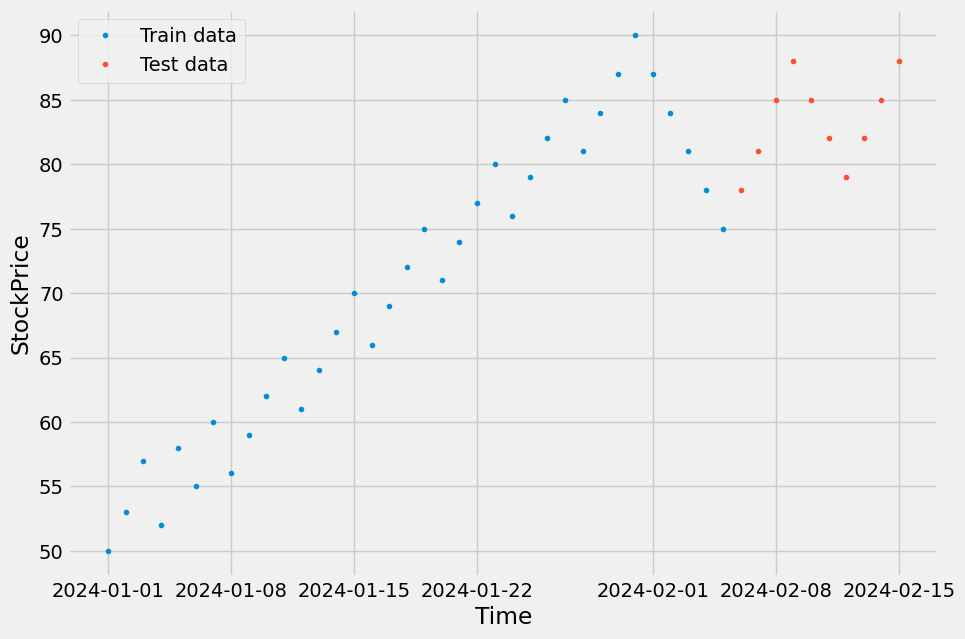

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([78, 81, 85, 88, 85, 82, 79, 82, 85]),
 array([78, 81, 85, 88, 85, 82, 79, 82, 85]))

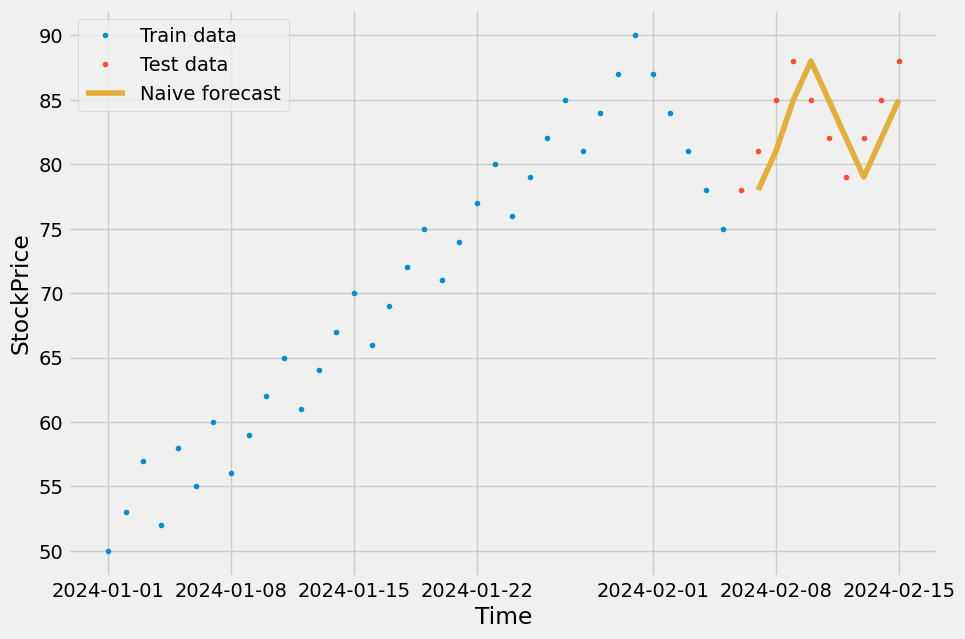

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 3.1111112,
 'mse': 9.777778,
 'rmse': 3.1269438,
 'mape': 3.711237,
 'mase': 0.9955556}

### Windowing dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(39, 39)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [50 53 57 52 58 55 60] -> Label: [56]
Window: [53 57 52 58 55 60 56] -> Label: [59]
Window: [57 52 58 55 60 56 59] -> Label: [62]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [78 81 85 88 85 82 79] -> Label: [82]
Window: [81 85 88 85 82 79 82] -> Label: [85]
Window: [85 88 85 82 79 82 85] -> Label: [88]


In [ ]:
# Make the train/test splits (Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction)
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(31, 8, 31, 8)

In [ ]:
from tensorflow.keras import layers
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[50]
 [53]
 [57]
 [52]
 [58]
 [55]
 [60]]


### Modelling

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    # Ensure the save_path directory exists
    os.makedirs(save_path, exist_ok=True)

    # Add ".h5" to the model_name if it doesn't have it
    if not model_name.endswith(".h5"):
        model_name += ".h5"

    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                               verbose=0,
                                               save_best_only=True)


In [ ]:
tf.random.set_seed(42)

# model
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model = tf.keras.Model(inputs=inputs, outputs=output, name="model1")

# Compile model
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model.name)])

Epoch 1/50
2/2 [==============================] - 4s 429ms/step - loss: 74.5622 - val_loss: 79.5178
Epoch 2/50
2/2 [==============================] - 0s 70ms/step - loss: 70.5368 - val_loss: 76.0351
Epoch 3/50
2/2 [==============================] - 0s 69ms/step - loss: 67.3623 - val_loss: 73.3509


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/50
2/2 [==============================] - 0s 116ms/step - loss: 64.9133 - val_loss: 70.8997
Epoch 5/50
2/2 [==============================] - 0s 68ms/step - loss: 62.7264 - val_loss: 68.3530
Epoch 6/50
2/2 [==============================] - 0s 80ms/step - loss: 60.4586 - val_loss: 65.7492
Epoch 7/50
2/2 [==============================] - 0s 74ms/step - loss: 58.0321 - val_loss: 62.8464
Epoch 8/50
2/2 [==============================] - 0s 64ms/step - loss: 55.1522 - val_loss: 59.0874
Epoch 9/50
2/2 [==============================] - 0s 77ms/step - loss: 51.6387 - val_loss: 54.6035
Epoch 10/50
2/2 [==============================] - 0s 65ms/step - loss: 47.8327 - val_loss: 50.3822
Epoch 11/50
2/2 [==============================] - 0s 46ms/step - loss: 44.2809 - val_loss: 46.9268
Epoch 12/50
2/2 [==============================] - 0s 47ms/step - loss: 41.2432 - val_loss: 43.7694
Epoch 13/50
2/2 [==============================] - 0s 44ms/step - loss: 38.3507 - val_loss: 40.2724
Epoch

In [ ]:
# Load in best performing model
model = tf.keras.models.load_model("/content/model_experiments/model1.h5")
model.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 182ms/step - loss: 3.0010


3.000978469848633

In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Get forecast predictions
model_preds = make_preds(model,
                           input_data=test_windows)
model_preds[:10]

1/1 [==============================] - 0s 311ms/step


<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([82.56327 , 81.92119 , 82.82035 , 83.60618 , 84.50206 , 85.397675,
       85.54859 , 85.74187 ], dtype=float32)>

In [ ]:
# Evaluate results for model predictions
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_preds)
model_results

{'mae': 3.0009785,
 'mse': 12.179657,
 'rmse': 3.4899364,
 'mape': 3.5771408,
 'mase': 1.0003262}

In [ ]:
naive_results

{'mae': 3.1111112,
 'mse': 9.777778,
 'rmse': 3.1269438,
 'mape': 3.711237,
 'mase': 0.9955556}

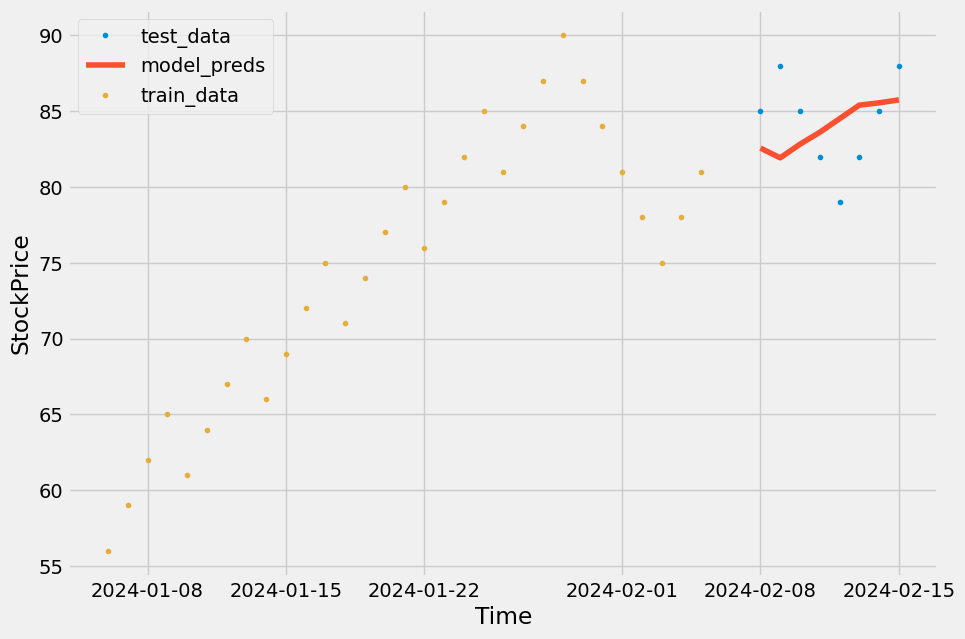

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, format="-", label="model_preds")
plot_time_series(timesteps=X_train[-len(train_windows):], values=train_labels[:, 0], label="train_data")

### Future Prediction

In [ ]:
# Add windowed columns
lumina_df = lumina.copy()
for i in range(WINDOW_SIZE):
  lumina_df[f"Stock_Price+{i+1}"] = lumina_df["Stock_Price"].shift(periods=i+1)
lumina_df.dropna().head()

,Stock_Price,Stock_Price+1,Stock_Price+2,Stock_Price+3,Stock_Price+4,Stock_Price+5,Stock_Price+6,Stock_Price+7
Date,,,,,,,,
2024-01-08,56,60.0,55.0,58.0,52.0,57.0,53.0,50.0
2024-01-09,59,56.0,60.0,55.0,58.0,52.0,57.0,53.0
2024-01-10,62,59.0,56.0,60.0,55.0,58.0,52.0,57.0
2024-01-11,65,62.0,59.0,56.0,60.0,55.0,58.0,52.0
2024-01-12,61,65.0,62.0,59.0,56.0,60.0,55.0,58.0


In [ ]:
X = lumina_df.dropna().drop("Stock_Price", axis=1).to_numpy()
y = lumina_df.dropna()["Stock_Price"].to_numpy()

In [ ]:
tf.random.set_seed(0)

# Train on entire data
model.fit(X,
            y,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model.name)])

Epoch 1/50
3/3 [==============================] - 1s 78ms/step - loss: 3.5327 - val_loss: 3.0050
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 3.3884 - val_loss: 3.0105
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 3.2843 - val_loss: 3.0751
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 3.3208 - val_loss: 3.3493
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 3.3416 - val_loss: 3.1024


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 3.2845 - val_loss: 3.0101
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 3.2808 - val_loss: 3.0087
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 3.2688 - val_loss: 3.0094
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 3.2873 - val_loss: 3.0870
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 3.2845 - val_loss: 3.0076
Epoch 11/50
3/3 [==============================] - 0s 33ms/step - loss: 3.2716 - val_loss: 3.0040
Epoch 12/50
3/3 [==============================] - 0s 25ms/step - loss: 3.2894 - val_loss: 3.0026
Epoch 13/50
3/3 [==============================] - 0s 23ms/step - loss: 3.2816 - val_loss: 3.0025
Epoch 14/50
3/3 [==============================] - 0s 19ms/step - loss: 3.2497 - val_loss: 3.1121
Epoch 15/50
3/3 [==============================] - 0s 20ms/step - loss: 3.3337 - val_loss: 3.2101
Epoch 16/50
3/3 [=======

In [ ]:
INTO_FUTURE = 7

In [ ]:
# Taken from Daniel Bourke GitHub repo for TIme Series BitCoin Prediction
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Make forecasts into future of the price
future_forecast = make_future_forecast(values=y,
                                       model=model,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 85ms/step
Predicting on: 
 [88 85 82 79 82 85 88] -> Prediction: 88.13555908203125

1/1 [==============================] - 0s 153ms/step
Predicting on: 
 [85.         82.         79.         82.         85.         88.
 88.13555908] -> Prediction: 88.4534912109375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [82.         79.         82.         85.         88.         88.13555908
 88.45349121] -> Prediction: 89.1844482421875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [79.         82.         85.         88.         88.13555908 88.45349121
 89.18444824] -> Prediction: 90.35829162597656

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [82.         85.         88.         88.13555908 88.45349121 89.18444824
 90.35829163] -> Prediction: 91.8995132446289

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [85.         88.         88.13555908 88.45349121 89.184

In [ ]:
# Last timestep of timesteps
last_timestep = lumina.index[-1]
last_timestep

Timestamp('2024-02-15 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, lumina["Stock_Price"].iloc[-1])
next_time_steps, future_forecast

(array(['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
        '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22'],
       dtype='datetime64[D]'),
 array([88.      , 88.13556 , 88.45349 , 89.18445 , 90.35829 , 91.89951 ,
        93.301094, 94.5694  ], dtype=float32))

### Future Predicitons Plot

(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

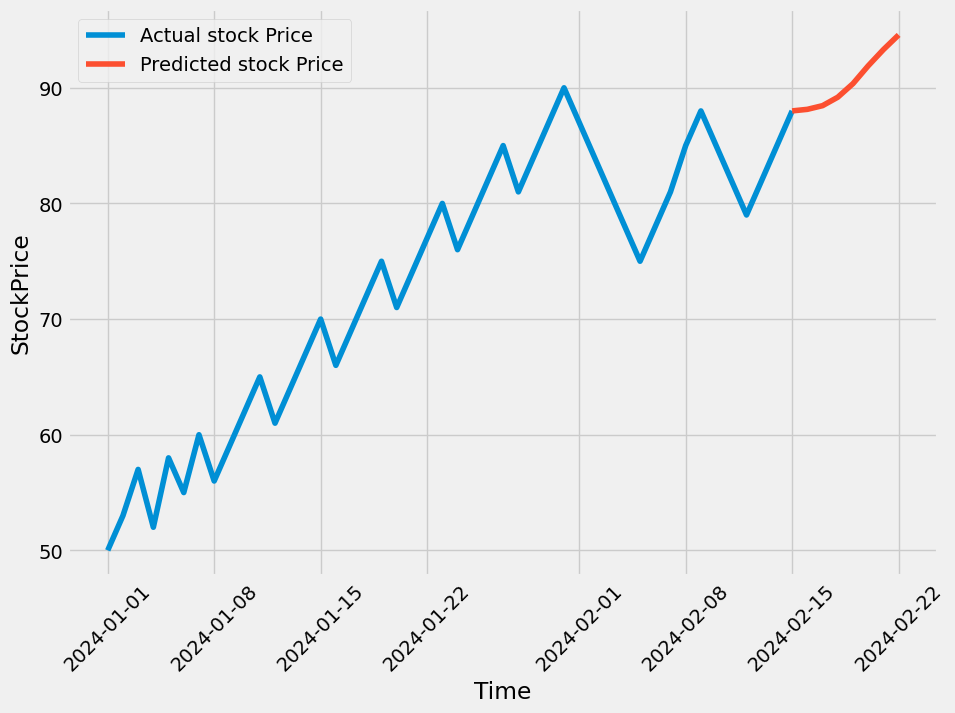

In [ ]:
# Plot future price predictions
plt.figure(figsize=(10, 7))
plot_time_series(lumina.index, lumina["Stock_Price"], format="-", label="Actual stock Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted stock Price")
plt.xticks(rotation=45)

## Nexus

In [ ]:
# Get date array
timesteps = nexus.index.to_numpy()
prices = nexus["Stock_Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
        '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
        '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
        '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
        '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([120, 114, 127, 120, 124, 118, 122, 118, 115, 119]))

### Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(39, 39)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [120 114 127 120 124 118 122] -> Label: [118]
Window: [114 127 120 124 118 122 118] -> Label: [115]
Window: [127 120 124 118 122 118 115] -> Label: [119]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(31, 8, 31, 8)

In [ ]:
from tensorflow.keras import layers
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[120]
 [114]
 [127]
 [120]
 [124]
 [118]
 [122]]


### Modelling

In [ ]:
tf.random.set_seed(0)

# model
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model2 = tf.keras.Model(inputs=inputs, outputs=output, name="model2")

# Compile model
model2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model2.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model2.name)])

Epoch 1/50
2/2 [==============================] - 2s 287ms/step - loss: 95.1843 - val_loss: 83.3760
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 92.7341 - val_loss: 80.6013
Epoch 3/50
2/2 [==============================] - 0s 48ms/step - loss: 89.7800 - val_loss: 76.7996
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 85.4268 - val_loss: 72.3732
Epoch 5/50
2/2 [==============================] - 0s 51ms/step - loss: 80.3017 - val_loss: 67.7483
Epoch 6/50
2/2 [==============================] - 0s 48ms/step - loss: 74.6194 - val_loss: 62.6456
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 68.4892 - val_loss: 56.9676
Epoch 8/50
2/2 [==============================] - 0s 46ms/step - loss: 61.8913 - val_loss: 50.6312
Epoch 9/50
2/2 [==============================] - 0s 46ms/step - loss: 55.4490 - val_loss: 44.8600
Epoch 10/50
2/2 [==============================] - 0s 46ms/step - loss: 50.3889 - val_loss: 40.2623
Epoch 11

In [ ]:
# Load in best performing model
model2 = tf.keras.models.load_model("/content/model_experiments/model2.h5/")
model2.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 284ms/step - loss: 2.7178


2.7178125381469727

In [ ]:
# Get forecast predictions
model_preds = make_preds(model2,
                           input_data=test_windows)
model_preds[:10]

1/1 [==============================] - 0s 193ms/step


<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([107.903915, 108.51481 , 107.54104 , 105.9676  , 105.48551 ,
       105.66334 , 103.90632 , 101.497   ], dtype=float32)>

In [ ]:
# Evaluate results for model 2 predictions
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_preds)
model_results

{'mae': 2.7178125,
 'mse': 10.376127,
 'rmse': 3.2211995,
 'mape': 2.5819414,
 'mase': 0.79269534}

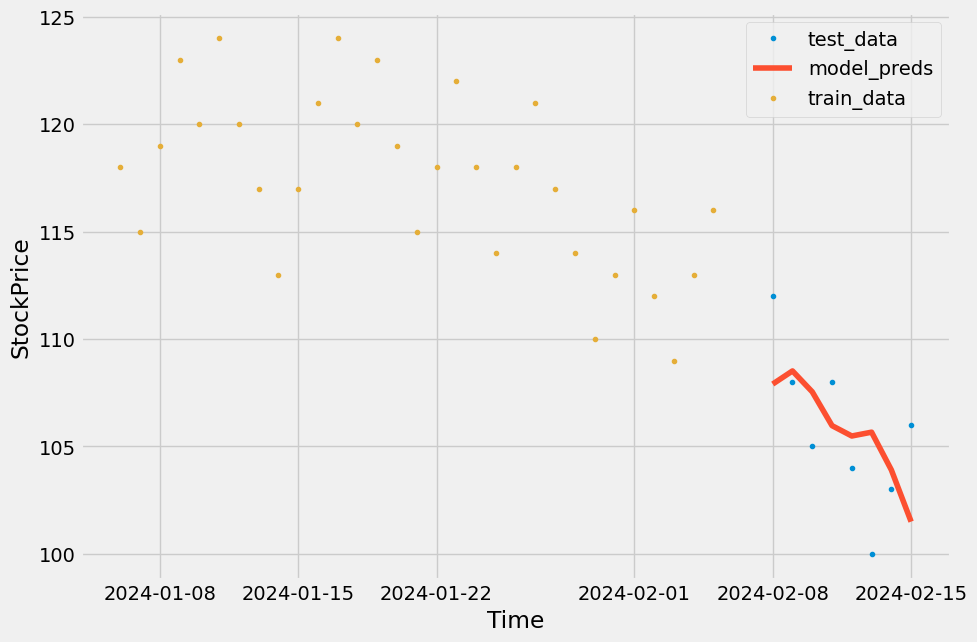

In [ ]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, format="-", label="model_preds")
plot_time_series(timesteps=X_train[-len(train_windows):], values=train_labels[:, 0], label="train_data")

### Future Predicition

In [ ]:
# Add windowed columns
nexus_df = nexus.copy()
for i in range(WINDOW_SIZE):
  nexus_df[f"Stock_Price+{i+1}"] = nexus_df["Stock_Price"].shift(periods=i+1)
nexus_df.dropna().head()

,Stock_Price,Stock_Price+1,Stock_Price+2,Stock_Price+3,Stock_Price+4,Stock_Price+5,Stock_Price+6,Stock_Price+7
Date,,,,,,,,
2024-01-08,118,122.0,118.0,124.0,120.0,127.0,114.0,120.0
2024-01-09,115,118.0,122.0,118.0,124.0,120.0,127.0,114.0
2024-01-10,119,115.0,118.0,122.0,118.0,124.0,120.0,127.0
2024-01-11,123,119.0,115.0,118.0,122.0,118.0,124.0,120.0
2024-01-12,120,123.0,119.0,115.0,118.0,122.0,118.0,124.0


In [ ]:
X = nexus_df.dropna().drop("Stock_Price", axis=1).to_numpy()
y = nexus_df.dropna()["Stock_Price"].to_numpy()

In [ ]:
model2.fit(X,
            y,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model.name)])

Epoch 1/50
3/3 [==============================] - 1s 46ms/step - loss: 4.0676 - val_loss: 2.9584
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 3.4828 - val_loss: 3.5771
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 3.0440 - val_loss: 4.6952
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 3.4024 - val_loss: 5.5021
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 3.4417 - val_loss: 4.6518
Epoch 6/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 19ms/step - loss: 3.0938 - val_loss: 3.7524
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 3.0294 - val_loss: 3.3794
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 3.3376 - val_loss: 3.2516
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 3.2333 - val_loss: 3.6514
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 3.0429 - val_loss: 4.1476
Epoch 11/50
3/3 [==============================] - 0s 18ms/step - loss: 2.9838 - val_loss: 4.4225
Epoch 12/50
3/3 [==============================] - 0s 18ms/step - loss: 3.0984 - val_loss: 4.3563
Epoch 13/50
3/3 [==============================] - 0s 20ms/step - loss: 3.0164 - val_loss: 3.9873
Epoch 14/50
3/3 [==============================] - 0s 16ms/step - loss: 2.9934 - val_loss: 3.7328
Epoch 15/50
3/3 [==============================] - 0s 16ms/step - loss: 3.0139 - val_loss: 3.7673
Epoch 16/50
3/3 [==================

In [ ]:
INTO_FUTURE = 7

In [ ]:
# Make forecasts into future
future_forecast = make_future_forecast(values=y,
                                       model=model2,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [108 105 108 104 100 103 106] -> Prediction: 104.76553344726562

1/1 [==============================] - 0s 148ms/step
Predicting on: 
 [105.         108.         104.         100.         103.
 106.         104.76553345] -> Prediction: 103.60032653808594

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [108.         104.         100.         103.         106.
 104.76553345 103.60032654] -> Prediction: 103.97880554199219

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [104.         100.         103.         106.         104.76553345
 103.60032654 103.97880554] -> Prediction: 102.88001251220703

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [100.         103.         106.         104.76553345 103.60032654
 103.97880554 102.88001251] -> Prediction: 101.82540130615234

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [103.         106.  

In [ ]:
# Last timestep of timesteps
last_timestep = nexus.index[-1]
last_timestep

Timestamp('2024-02-15 00:00:00')

In [ ]:
# Get next tweek of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, nexus["Stock_Price"].iloc[-1])
next_time_steps, future_forecast

(array(['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
        '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22'],
       dtype='datetime64[D]'),
 array([106.      , 104.76553 , 103.60033 , 103.978806, 102.88001 ,
        101.8254  , 102.36563 , 103.02942 ], dtype=float32))

### Future Predicition Plot

(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

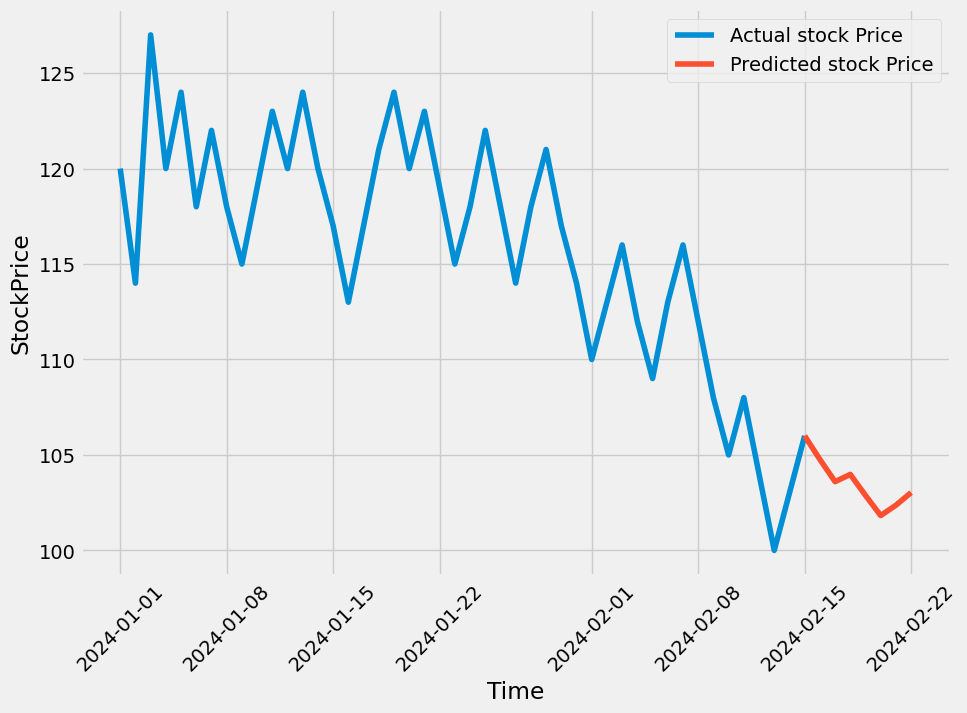

In [ ]:
# Plot future price predictions
plt.figure(figsize=(10, 7))
plot_time_series(nexus.index, nexus["Stock_Price"], format="-", label="Actual stock Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted stock Price")
plt.xticks(rotation=45)

## Quantumize

In [ ]:
# Get date array
timesteps = quantumize.index.to_numpy()
prices = quantumize["Stock_Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
        '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
        '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
        '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
        '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([80, 83, 86, 84, 81, 79, 82, 85, 87, 89]))

### Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(39, 39)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [80 83 86 84 81 79 82] -> Label: [85]
Window: [83 86 84 81 79 82 85] -> Label: [87]
Window: [86 84 81 79 82 85 87] -> Label: [89]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(31, 8, 31, 8)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[80]
 [83]
 [86]
 [84]
 [81]
 [79]
 [82]]


### Modelling

In [ ]:
tf.random.set_seed(42)

# model
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model3 = tf.keras.Model(inputs=inputs, outputs=output, name="model3")

# Compile model
model3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit
model3.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model3.name)])

Epoch 1/50
2/2 [==============================] - 2s 280ms/step - loss: 88.6886 - val_loss: 87.4213
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 83.8813 - val_loss: 82.7933
Epoch 3/50
2/2 [==============================] - 0s 44ms/step - loss: 79.2125 - val_loss: 78.7315
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 74.7616 - val_loss: 74.8438
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 70.5001 - val_loss: 70.6253
Epoch 6/50
2/2 [==============================] - 0s 47ms/step - loss: 66.1451 - val_loss: 66.0980
Epoch 7/50
2/2 [==============================] - 0s 45ms/step - loss: 61.7906 - val_loss: 61.6537
Epoch 8/50
2/2 [==============================] - 0s 44ms/step - loss: 57.5290 - val_loss: 57.2423
Epoch 9/50
2/2 [==============================] - 0s 47ms/step - loss: 53.1769 - val_loss: 52.5150
Epoch 10/50
2/2 [==============================] - 0s 59ms/step - loss: 48.3677 - val_loss: 47.2869
Epoch 11

In [ ]:
# Load in best performing model
model3 = tf.keras.models.load_model("/content/model_experiments/model3.h5/")
model3.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 290ms/step - loss: 4.7776


4.777592658996582

In [ ]:
# Get forecast predictions
model_preds = make_preds(model3,
                           input_data=test_windows)
model_preds[:10]

1/1 [==============================] - 0s 152ms/step


<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([77.647316, 78.38718 , 79.531334, 80.90056 , 82.88767 , 84.68028 ,
       85.3011  , 84.81807 ], dtype=float32)>

In [ ]:
# Evaluate results for model predictions
model_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_preds)
model_results

{'mae': 4.7775927,
 'mse': 26.7016,
 'rmse': 5.167359,
 'mape': 5.80057,
 'mase': 1.967244}

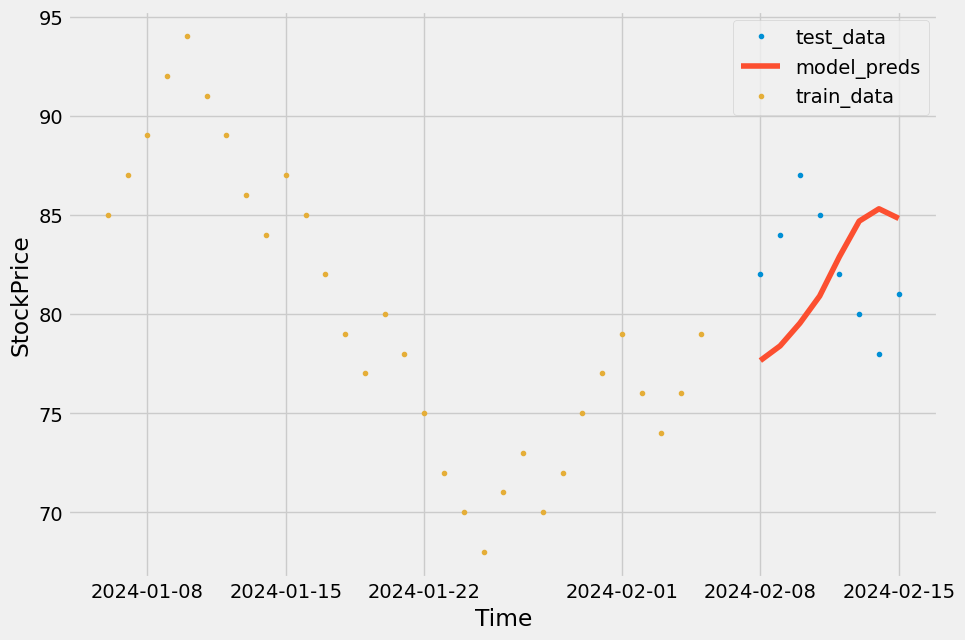

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, format="-", label="model_preds")
plot_time_series(timesteps=X_train[-len(train_windows):], values=train_labels[:, 0], label="train_data")

### Future Prediction

In [ ]:
# Add windowed columns
quantumize_df = quantumize.copy()
for i in range(WINDOW_SIZE):
  quantumize_df[f"Stock_Price+{i+1}"] = quantumize_df["Stock_Price"].shift(periods=i+1)
quantumize_df.dropna().head()

,Stock_Price,Stock_Price+1,Stock_Price+2,Stock_Price+3,Stock_Price+4,Stock_Price+5,Stock_Price+6,Stock_Price+7
Date,,,,,,,,
2024-01-08,85,82.0,79.0,81.0,84.0,86.0,83.0,80.0
2024-01-09,87,85.0,82.0,79.0,81.0,84.0,86.0,83.0
2024-01-10,89,87.0,85.0,82.0,79.0,81.0,84.0,86.0
2024-01-11,92,89.0,87.0,85.0,82.0,79.0,81.0,84.0
2024-01-12,94,92.0,89.0,87.0,85.0,82.0,79.0,81.0


In [ ]:
X = quantumize_df.dropna().drop("Stock_Price", axis=1).to_numpy()
y = quantumize_df.dropna()["Stock_Price"].to_numpy()

In [ ]:
model3.fit(X,
            y,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels))

Epoch 1/50
3/3 [==============================] - 1s 38ms/step - loss: 4.6159 - val_loss: 5.0663
Epoch 2/50
3/3 [==============================] - 0s 17ms/step - loss: 4.4482 - val_loss: 5.4815
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 4.8008 - val_loss: 6.1222
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 4.8466 - val_loss: 6.0435
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 4.7960 - val_loss: 5.6981
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 4.6410 - val_loss: 5.4042
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 4.5377 - val_loss: 5.2566
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 4.5053 - val_loss: 5.0639
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 4.4258 - val_loss: 4.8923
Epoch 10/50
3/3 [==============================] - 0s 16ms/step - loss: 4.5343 - val_loss: 4.7697
Epoch 11/50
3/3 [============

In [ ]:
INTO_FUTURE = 7

In [ ]:
future_forecast = make_future_forecast(values=y,
                                       model=model3,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [84 87 85 82 80 78 81] -> Prediction: 84.62584686279297

1/1 [==============================] - 0s 143ms/step
Predicting on: 
 [87.         85.         82.         80.         78.         81.
 84.62584686] -> Prediction: 85.3726577758789

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [85.         82.         80.         78.         81.         84.62584686
 85.37265778] -> Prediction: 81.32138061523438

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [82.         80.         78.         81.         84.62584686 85.37265778
 81.32138062] -> Prediction: 80.27906799316406

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [80.         78.         81.         84.62584686 85.37265778 81.32138062
 80.27906799] -> Prediction: 82.26058959960938

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [78.         81.         84.62584686 85.37265778 81.3

In [ ]:
last_timestep = quantumize.index[-1]
last_timestep

Timestamp('2024-02-15 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, quantumize["Stock_Price"].iloc[-1])
next_time_steps, future_forecast

(array(['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
        '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22'],
       dtype='datetime64[D]'),
 array([81.     , 84.62585, 85.37266, 81.32138, 80.27907, 82.26059,
        81.82635, 81.26885], dtype=float32))

### Future Prediction Plot

(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

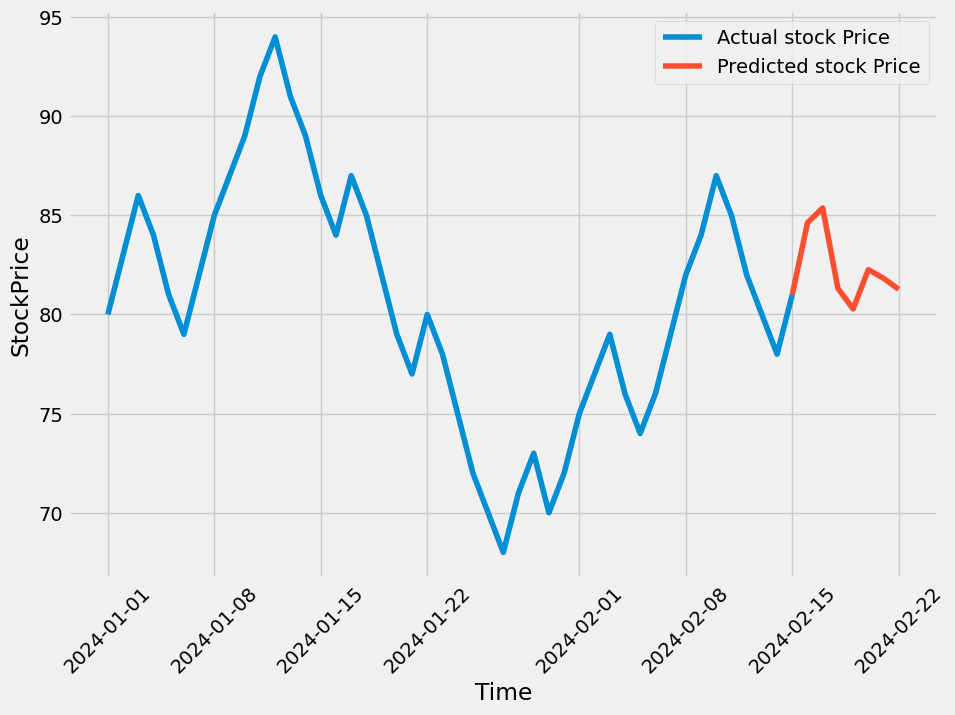

In [ ]:
# Plot future price predictions
plt.figure(figsize=(10, 7))
plot_time_series(quantumize.index, quantumize["Stock_Price"], format="-", label="Actual stock Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted stock Price")
plt.xticks(rotation=45)

## Synthify

In [ ]:
# Get date array
timesteps = synthify.index.to_numpy()
prices = synthify["Stock_Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
        '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
        '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
        '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
        '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([150, 156, 161, 155, 150, 152, 148, 151, 153, 156]))

### Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(39, 39)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [150 156 161 155 150 152 148] -> Label: [151]
Window: [156 161 155 150 152 148 151] -> Label: [153]
Window: [161 155 150 152 148 151 153] -> Label: [156]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(31, 8, 31, 8)

In [ ]:
from tensorflow.keras import layers
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[150]
 [156]
 [161]
 [155]
 [150]
 [152]
 [148]]


### Modelling

In [ ]:
tf.random.set_seed(42)

# model
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(64, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model4 = tf.keras.Model(inputs=inputs, outputs=output, name="model4")

# Compile model
model4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.010))

# model4
model4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=64,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model4.name)])

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 153.3179 - val_loss: 139.8362
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 145.5347 - val_loss: 129.0909
Epoch 3/100
1/1 [==============================] - 0s 67ms/step - loss: 134.0807 - val_loss: 115.9882
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 120.0020

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 67ms/step - loss: 120.0020 - val_loss: 102.3523
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 105.4883 - val_loss: 84.5138
Epoch 6/100
1/1 [==============================] - 0s 65ms/step - loss: 86.3606 - val_loss: 62.3401
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 62.7726 - val_loss: 35.2436
Epoch 8/100
1/1 [==============================] - 0s 66ms/step - loss: 33.8557 - val_loss: 6.1560
Epoch 9/100
1/1 [==============================] - 0s 39ms/step - loss: 4.5711 - val_loss: 26.6524
Epoch 10/100
1/1 [==============================] - 0s 40ms/step - loss: 32.2106 - val_loss: 34.7089
Epoch 11/100
1/1 [==============================] - 0s 37ms/step - loss: 40.8088 - val_loss: 29.3116
Epoch 12/100
1/1 [==============================] - 0s 39ms/step - loss: 35.0457 - val_loss: 15.6761
Epoch 13/100
1/1 [==============================] - 0s 42ms/step - loss: 20.4891 - val_loss: 6.3775
Epoch 14

In [ ]:
# Load in best performing model
model4 = tf.keras.models.load_model("/content/model_experiments/model4.h5")
model4.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 320ms/step - loss: 3.9645


3.9644603729248047

In [ ]:
# Get forecast predictions
model_preds = make_preds(model4,
                           input_data=test_windows)
model_preds[:10]

1/1 [==============================] - 0s 259ms/step


<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([151.95522, 149.52495, 148.72166, 148.86778, 150.653  , 152.55025,
       154.94164, 157.47348], dtype=float32)>

In [ ]:
# Evaluate results for model 2 predictions
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_preds)
model_results

{'mae': 3.9644604,
 'mse': 27.816587,
 'rmse': 5.274143,
 'mape': 2.705995,
 'mase': 1.3214868}

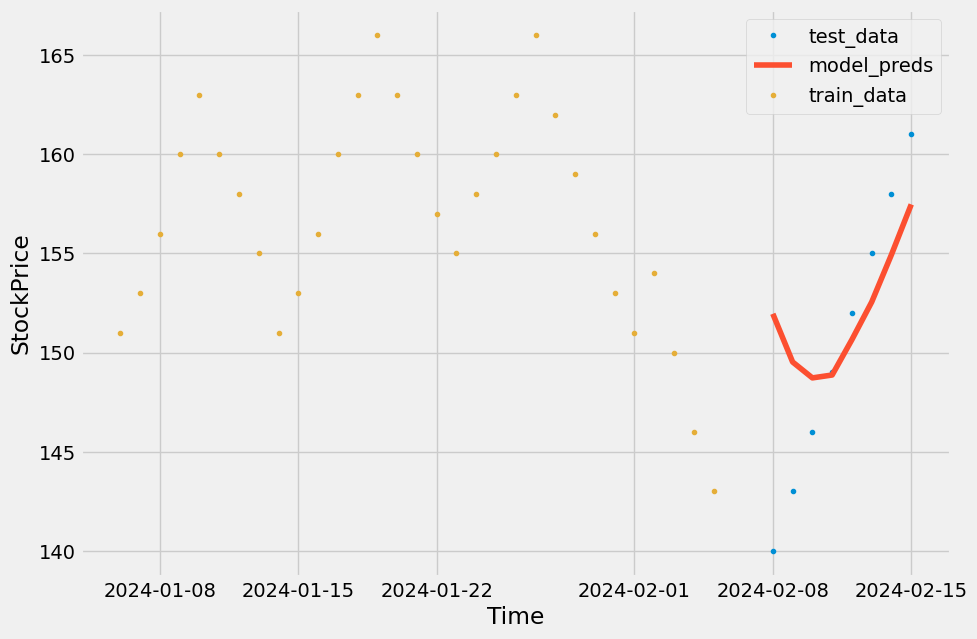

In [ ]:
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, format="-", label="model_preds")
plot_time_series(timesteps=X_train[-len(train_windows):], values=train_labels[:, 0], label="train_data")

### Future Predicition

In [ ]:
# Add windowed columns
synthify_df = synthify.copy()
for i in range(WINDOW_SIZE):
  synthify_df[f"Stock_Price+{i+1}"] = synthify_df["Stock_Price"].shift(periods=i+1)
synthify_df.dropna().head()

,Stock_Price,Stock_Price+1,Stock_Price+2,Stock_Price+3,Stock_Price+4,Stock_Price+5,Stock_Price+6,Stock_Price+7
Date,,,,,,,,
2024-01-08,151,148.0,152.0,150.0,155.0,161.0,156.0,150.0
2024-01-09,153,151.0,148.0,152.0,150.0,155.0,161.0,156.0
2024-01-10,156,153.0,151.0,148.0,152.0,150.0,155.0,161.0
2024-01-11,160,156.0,153.0,151.0,148.0,152.0,150.0,155.0
2024-01-12,163,160.0,156.0,153.0,151.0,148.0,152.0,150.0


In [ ]:
X = synthify_df.dropna().drop("Stock_Price", axis=1).to_numpy()
y = synthify_df.dropna()["Stock_Price"].to_numpy()

In [ ]:
model4.fit(X,
            y,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model.name)])

Epoch 1/50
3/3 [==============================] - 2s 55ms/step - loss: 6.2162 - val_loss: 7.1276
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 5.6782 - val_loss: 6.1949
Epoch 3/50
3/3 [==============================] - 0s 34ms/step - loss: 5.6982 - val_loss: 6.1790
Epoch 4/50
1/3 [=========>....................] - ETA: 0s - loss: 5.1238

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 20ms/step - loss: 5.6231 - val_loss: 8.6437
Epoch 5/50
3/3 [==============================] - 0s 33ms/step - loss: 5.5755 - val_loss: 5.7719
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 5.8843 - val_loss: 9.1444
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 7.6238 - val_loss: 7.3105
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 6.2197 - val_loss: 6.1015
Epoch 9/50
3/3 [==============================] - 0s 21ms/step - loss: 5.8206 - val_loss: 8.2227
Epoch 10/50
3/3 [==============================] - 0s 30ms/step - loss: 5.7516 - val_loss: 6.5618
Epoch 11/50
3/3 [==============================] - 0s 21ms/step - loss: 5.9388 - val_loss: 6.1240
Epoch 12/50
3/3 [==============================] - 0s 28ms/step - loss: 6.1579 - val_loss: 6.5541
Epoch 13/50
3/3 [==============================] - 0s 21ms/step - loss: 7.1880 - val_loss: 10.9886
Epoch 14/50
3/3 [===================

In [ ]:
INTO_FUTURE = 7

In [ ]:
# Make forecasts into future
future_forecast = make_future_forecast(values=y,
                                       model=model4,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 33ms/step
Predicting on: 
 [143 146 149 152 155 158 161] -> Prediction: 148.6392822265625

1/1 [==============================] - 0s 393ms/step
Predicting on: 
 [146.         149.         152.         155.         158.
 161.         148.63928223] -> Prediction: 148.5950927734375

1/1 [==============================] - 0s 26ms/step
Predicting on: 
 [149.         152.         155.         158.         161.
 148.63928223 148.59509277] -> Prediction: 149.0322723388672

1/1 [==============================] - 0s 31ms/step
Predicting on: 
 [152.         155.         158.         161.         148.63928223
 148.59509277 149.03227234] -> Prediction: 149.79360961914062

1/1 [==============================] - 0s 27ms/step
Predicting on: 
 [155.         158.         161.         148.63928223 148.59509277
 149.03227234 149.79360962] -> Prediction: 149.60205078125

1/1 [==============================] - 0s 29ms/step
Predicting on: 
 [158.         161.        

In [ ]:
# Last timestep of timesteps
last_timestep = synthify.index[-1]
last_timestep

Timestamp('2024-02-15 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, synthify["Stock_Price"].iloc[-1])
next_time_steps, future_forecast

(array(['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
        '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22'],
       dtype='datetime64[D]'),
 array([161.     , 148.63928, 148.5951 , 149.03227, 149.79361, 149.60205,
        150.16089, 148.8372 ], dtype=float32))

### Future Prediction Plot

(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

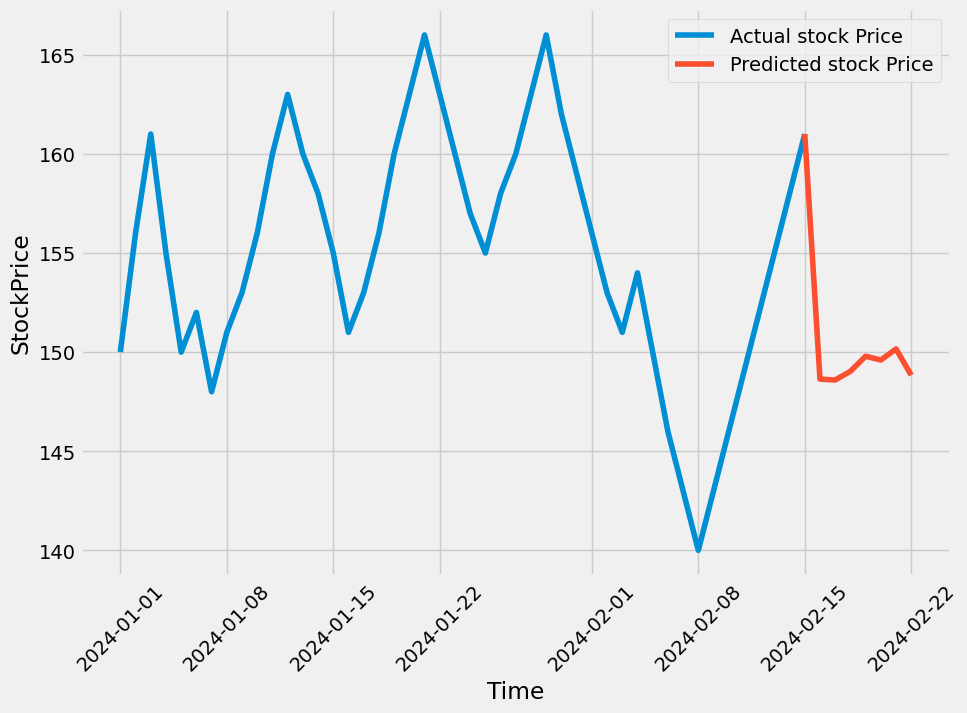

In [ ]:
# Plot future price predictions
plt.figure(figsize=(10, 7))
plot_time_series(synthify.index, synthify["Stock_Price"], format="-", label="Actual stock Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted stock Price")
plt.xticks(rotation=45)

## Zenith

In [ ]:
# Get date array
timesteps = zenith.index.to_numpy()
prices = zenith["Stock_Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2024-01-01T00:00:00.000000000', '2024-01-02T00:00:00.000000000',
        '2024-01-03T00:00:00.000000000', '2024-01-04T00:00:00.000000000',
        '2024-01-05T00:00:00.000000000', '2024-01-06T00:00:00.000000000',
        '2024-01-07T00:00:00.000000000', '2024-01-08T00:00:00.000000000',
        '2024-01-09T00:00:00.000000000', '2024-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([100,  98, 101,  97,  95,  92,  89,  92,  91,  88]))

### Windowing Dataset

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(39, 39)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [100  98 101  97  95  92  89] -> Label: [92]
Window: [ 98 101  97  95  92  89  92] -> Label: [91]
Window: [101  97  95  92  89  92  91] -> Label: [88]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(31, 8, 31, 8)

In [ ]:
from tensorflow.keras import layers
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[100]
 [ 98]
 [101]
 [ 97]
 [ 95]
 [ 92]
 [ 89]]


### Modelling

In [ ]:
tf.random.set_seed(0)

# model
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = tf.keras.layers.LSTM(64, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model5 = tf.keras.Model(inputs=inputs, outputs=output, name="model5")

# Compile model
model5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# fit
model5.fit(train_windows,
            train_labels,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model5.name)])

Epoch 1/50
2/2 [==============================] - 3s 587ms/step - loss: 53.1309 - val_loss: 16.7600
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 50.1591 - val_loss: 15.5085
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 47.6612 - val_loss: 14.3264
Epoch 4/50
2/2 [==============================] - 0s 44ms/step - loss: 45.2999 - val_loss: 13.1619
Epoch 5/50
2/2 [==============================] - 0s 45ms/step - loss: 42.8829 - val_loss: 11.9048
Epoch 6/50
2/2 [==============================] - 0s 54ms/step - loss: 39.9657 - val_loss: 10.4857
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 36.8748 - val_loss: 8.8846
Epoch 8/50
2/2 [==============================] - 0s 46ms/step - loss: 33.2522 - val_loss: 7.1137
Epoch 9/50
2/2 [==============================] - 0s 50ms/step - loss: 29.1219 - val_loss: 5.1962
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 24.4748 - val_loss: 3.4489
Epoch 11/50


In [ ]:
# Load in best performing model
model5 = tf.keras.models.load_model("/content/model_experiments/model5.h5/")
model5.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 181ms/step - loss: 1.9089


1.908879280090332

In [ ]:
# Get forecast predictions
model_preds = make_preds(model5,
                           input_data=test_windows)
model_preds[:10]

1/1 [==============================] - 0s 149ms/step


<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([26.205004, 25.46396 , 23.962439, 21.766476, 19.826393, 17.36349 ,
       15.137528, 12.808551], dtype=float32)>

In [ ]:
# Evaluate results for model predictions
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_preds)
model_results

{'mae': 1.9088793,
 'mse': 5.244897,
 'rmse': 2.290174,
 'mape': 13.734065,
 'mase': 0.66810775}

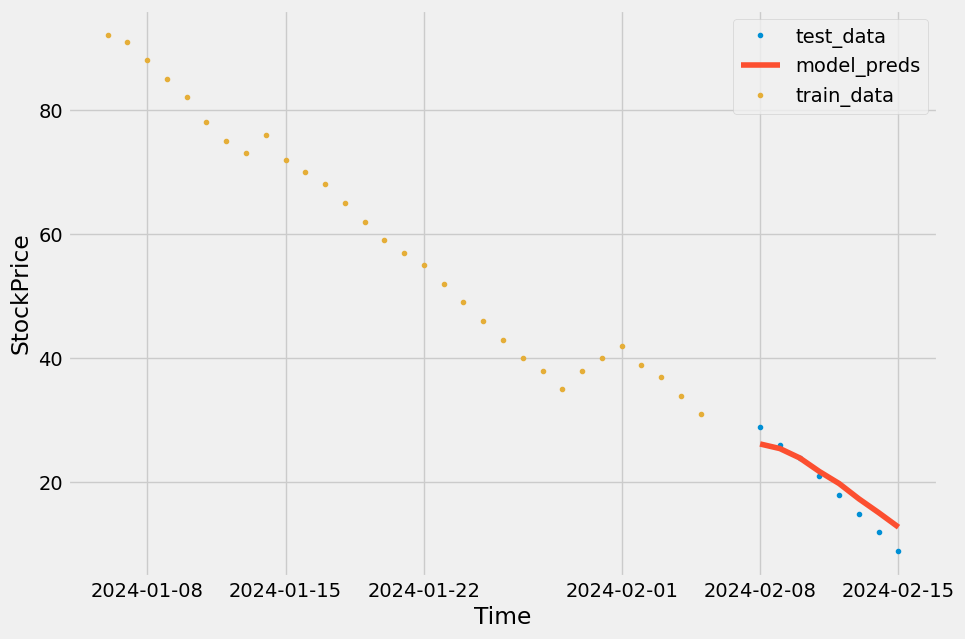

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_preds, format="-", label="model_preds")
plot_time_series(timesteps=X_train[-len(train_windows):], values=train_labels[:, 0], label="train_data")

### Future Prediciton

In [ ]:
# Add windowed columns
zenith_df = zenith.copy()
for i in range(WINDOW_SIZE):
  zenith_df[f"Stock_Price+{i+1}"] = zenith_df["Stock_Price"].shift(periods=i+1)
zenith_df.dropna().head()

,Stock_Price,Stock_Price+1,Stock_Price+2,Stock_Price+3,Stock_Price+4,Stock_Price+5,Stock_Price+6,Stock_Price+7
Date,,,,,,,,
2024-01-08,92,89.0,92.0,95.0,97.0,101.0,98.0,100.0
2024-01-09,91,92.0,89.0,92.0,95.0,97.0,101.0,98.0
2024-01-10,88,91.0,92.0,89.0,92.0,95.0,97.0,101.0
2024-01-11,85,88.0,91.0,92.0,89.0,92.0,95.0,97.0
2024-01-12,82,85.0,88.0,91.0,92.0,89.0,92.0,95.0


In [ ]:
# Make features and labels
X = zenith_df.dropna().drop("Stock_Price", axis=1).to_numpy()
y = zenith_df.dropna()["Stock_Price"].to_numpy()

X.shape, y.shape

((39, 7), (39,))

In [ ]:
model5.fit(X,
            y,
            epochs=50,
            verbose=1,
            batch_size=16,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model5.name)])

Epoch 1/50
3/3 [==============================] - 1s 46ms/step - loss: 7.7613 - val_loss: 4.2376
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 4.0249 - val_loss: 6.9124
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 4.9723 - val_loss: 7.7788
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 5.3429 - val_loss: 7.5532
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 4.5564 - val_loss: 6.8903
Epoch 6/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 3.9040 - val_loss: 6.0953
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 3.5287 - val_loss: 5.4571
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 3.7529 - val_loss: 4.8667
Epoch 9/50
3/3 [==============================] - 0s 15ms/step - loss: 3.7319 - val_loss: 4.5437
Epoch 10/50
3/3 [==============================] - 0s 16ms/step - loss: 3.5253 - val_loss: 4.6988
Epoch 11/50
3/3 [==============================] - 0s 20ms/step - loss: 3.1062 - val_loss: 5.0112
Epoch 12/50
3/3 [==============================] - 0s 16ms/step - loss: 2.9461 - val_loss: 5.1245
Epoch 13/50
3/3 [==============================] - 0s 16ms/step - loss: 2.4846 - val_loss: 4.3247
Epoch 14/50
3/3 [==============================] - 0s 16ms/step - loss: 2.2436 - val_loss: 4.6582
Epoch 15/50
3/3 [==============================] - 0s 16ms/step - loss: 2.0246 - val_loss: 5.4059
Epoch 16/50
3/3 [==================

In [ ]:
INTO_FUTURE = 7

In [ ]:
# Make forecasts into future of the price
future_forecast = make_future_forecast(values=y,
                                       model=model5,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [26 24 21 18 15 12  9] -> Prediction: 14.080243110656738

1/1 [==============================] - 0s 152ms/step
Predicting on: 
 [24.         21.         18.         15.         12.          9.
 14.08024311] -> Prediction: 13.026649475097656

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [21.         18.         15.         12.          9.         14.08024311
 13.02664948] -> Prediction: 10.980570793151855

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [18.         15.         12.          9.         14.08024311 13.02664948
 10.98057079] -> Prediction: 8.249014854431152

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [15.         12.          9.         14.08024311 13.02664948 10.98057079
  8.24901485] -> Prediction: 6.48776388168335

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [12.          9.         14.08024311 13.02664948 1

In [ ]:
# Last timestep of timesteps
last_timestep = zenith.index[-1]
last_timestep

Timestamp('2024-02-15 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, zenith["Stock_Price"].iloc[-1])
next_time_steps, future_forecast

(array(['2024-02-15', '2024-02-16', '2024-02-17', '2024-02-18',
        '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22'],
       dtype='datetime64[D]'),
 array([ 9.       , 14.080243 , 13.026649 , 10.980571 ,  8.249015 ,
         6.487764 ,  5.5183325,  4.762564 ], dtype=float32))

### Future Prediction Plot

(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

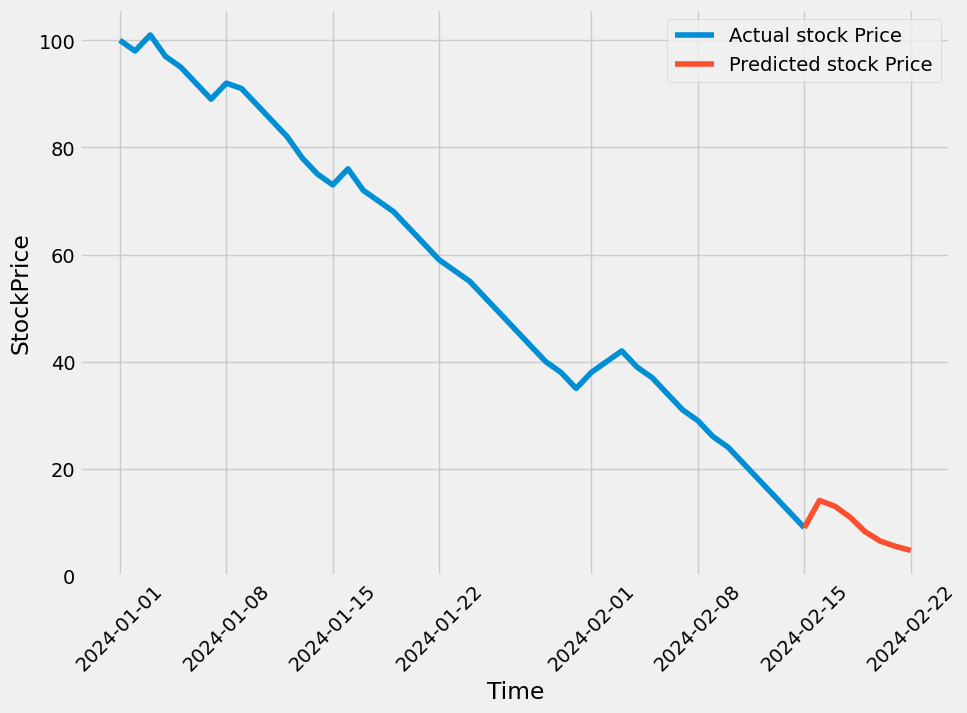

In [ ]:
# Plot future price predictions
plt.figure(figsize=(10, 7))
plot_time_series(zenith.index, zenith["Stock_Price"], format="-", label="Actual stock Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted stock Price")
plt.xticks(rotation=45)

In [ ]:
import pandas as pd

data = {
    'ZENITH': [16.54633331298828, 14.088373184204102, 12.748761177062988, 10.00537395477295,8.470556259155273,6.965215682983398,8.507911682128906],
    'SYNTHIFY': [152.56906127929688,  153.78086853027344, 154.7410888671875, 155.29542541503906, 157.0062255859375, 157.33636474609375, 156.7108306884765],
    'QUANTUMIZE': [83.56182098388672, 85.88236999511719,  83.18670654296875, 80.00965118408203, 80.22559356689453, 78.80316925048828, 80.64459228515625],
    'NEXUS': [104.816650390625,102.3831787109375, 102.99588012695312,102.12876892089844,101.01964569091797,101.34393310546875,101.92630004882812],
    'lumina': [90.72627258300781, 89.50856018066406, 84.97201538085938, 83.89037322998047, 87.78638458251953, 92.15631866455078,  94.7286376953125],
}

dates = ['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22']

df = pd.DataFrame(data, index=dates)
df = df.round(2)  # Round to 2 decimal places
df


,ZENITH,SYNTHIFY,QUANTUMIZE,NEXUS,lumina
2024-02-16,16.55,152.57,83.56,104.82,90.73
2024-02-17,14.09,153.78,85.88,102.38,89.51
2024-02-18,12.75,154.74,83.19,103.00,84.97
2024-02-19,10.01,155.30,80.01,102.13,83.89
2024-02-20,8.47,157.01,80.23,101.02,87.79
2024-02-21,6.97,157.34,78.80,101.34,92.16
2024-02-22,8.51,156.71,80.64,101.93,94.73


In [ ]:
import pandas as pd

data = {
    'Model': ['Lumina', 'Nexus', 'Quantumize', 'Synthify', 'Zenith'],
    'MAE': [1.8062439, 2.3228636, 1.7907658, 5.509342, 2.8519738],
    'MSE': [4.932947, 7.770403, 4.446442, 50.370117, 11.378832],
    'RMSE': [2.2210238, 2.7875443, 2.1086588, 7.097191, 3.3732524]
}


df = pd.DataFrame(data)
df.to_csv('model_metrics.csv', index=False)
df

,Model,MAE,MSE,RMSE
0,Lumina,1.806244,4.932947,2.221024
1,Nexus,2.322864,7.770403,2.787544
2,Quantumize,1.790766,4.446442,2.108659
3,Synthify,5.509342,50.370117,7.097191
4,Zenith,2.851974,11.378832,3.373252


## Volatality Plots

In [ ]:
def plot_stock_and_volatility(dataframe,name, stock_price_column='Stock_Price', figsize=(10, 7)):
    dataframe['Volatility'] = dataframe[stock_price_column].pct_change().rolling(window=len(dataframe), min_periods=1).std()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True)

    ax1.plot(dataframe.index, dataframe[stock_price_column], label='Stock Price', color='blue')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{name} Stock Price', fontsize=16)
    ax1.legend(fontsize=12)

    ax2.plot(dataframe.index, dataframe['Volatility'], label='Volatility', color='orange')
    ax2.set_title(f'Volatility Over Time for {name}')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volatility')

    ax2.tick_params(axis='x', rotation=45)

    ax2.legend(fontsize=12)

    plt.tight_layout()
    plt.show()


### Synthify

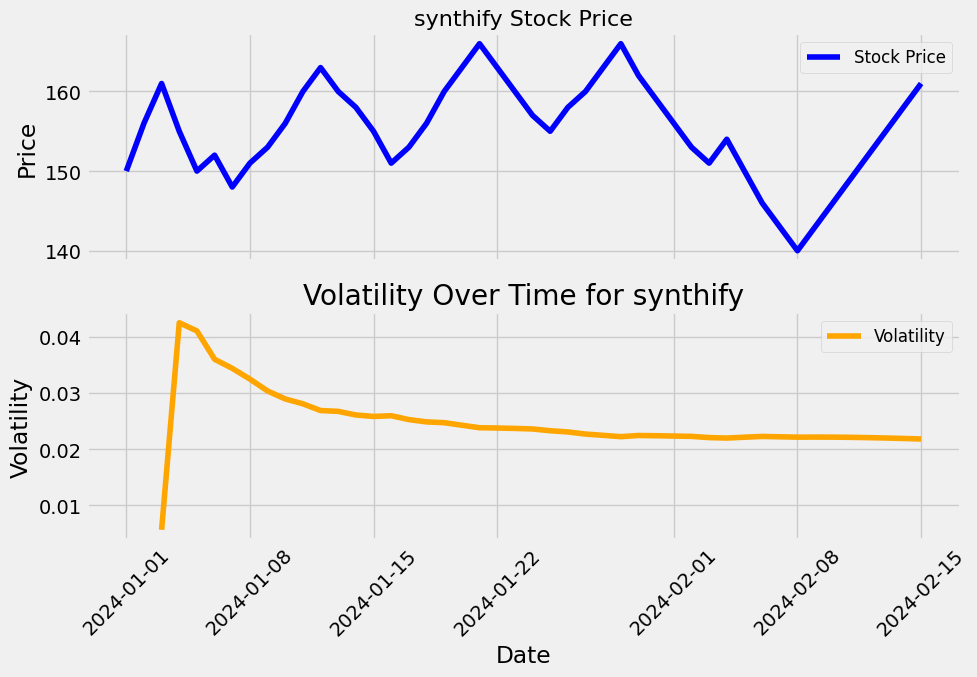

In [ ]:
plot_stock_and_volatility(synthify,"synthify")

### Nexus

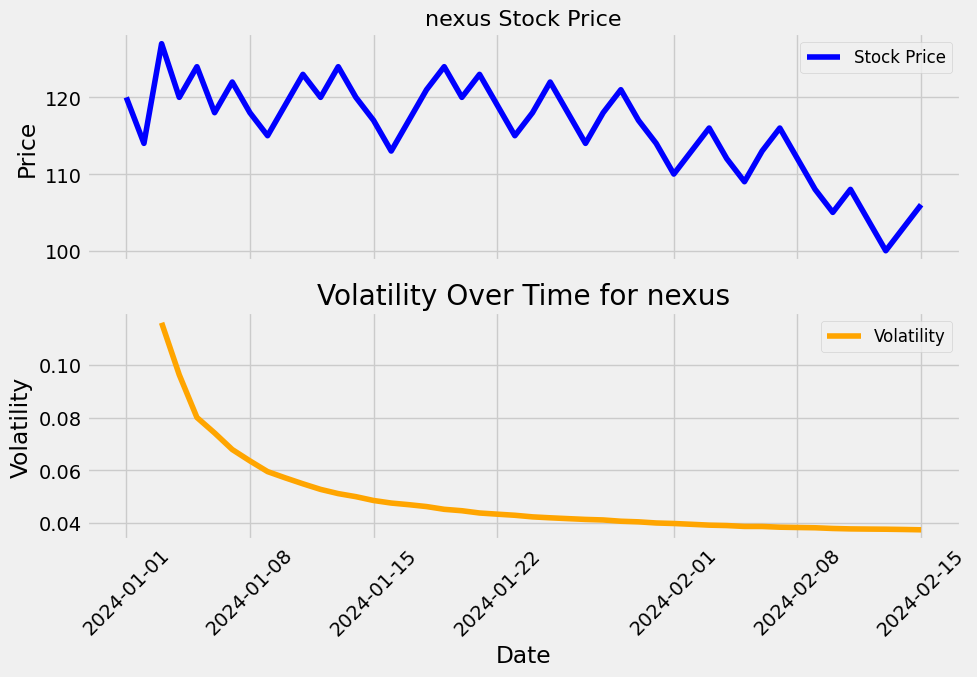

In [ ]:
plot_stock_and_volatility(nexus,"nexus")

### Quantumize

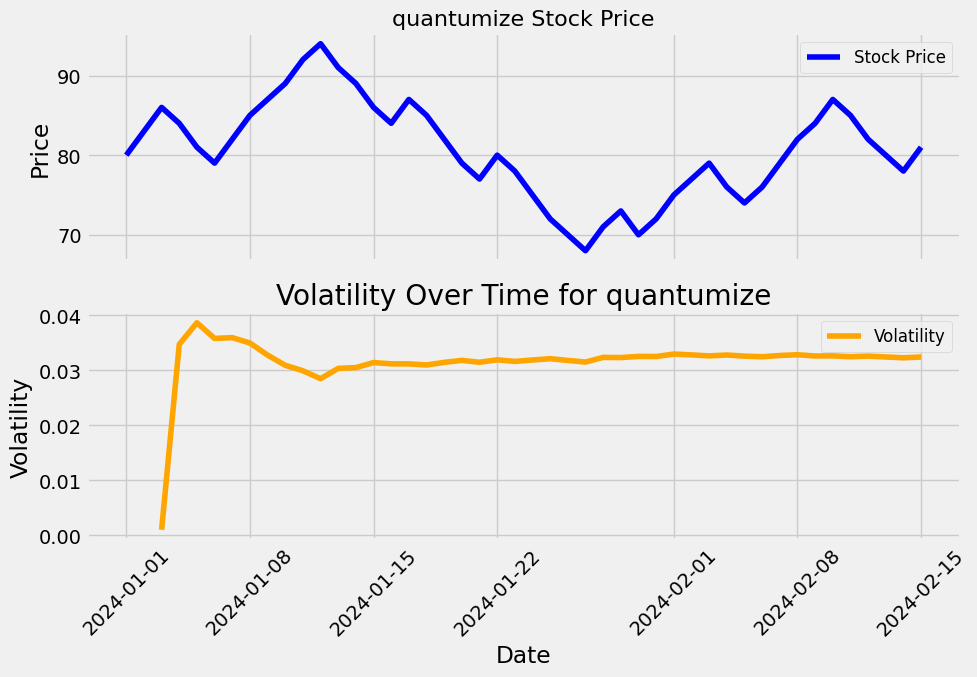

In [ ]:
plot_stock_and_volatility(quantumize,"quantumize")

## Prediction Analysis

In [ ]:
import pandas as pd

data = {
    'ZENITH': [16.54633331298828, 14.088373184204102, 12.748761177062988, 10.00537395477295,8.470556259155273,6.965215682983398,8.507911682128906],
    'SYNTHIFY': [152.56906127929688,  153.78086853027344, 154.7410888671875, 155.29542541503906, 157.0062255859375, 157.33636474609375, 156.7108306884765],
    'QUANTUMIZE': [83.56182098388672, 85.88236999511719,  83.18670654296875, 80.00965118408203, 80.22559356689453, 78.80316925048828, 80.64459228515625],
    'NEXUS': [104.816650390625,102.3831787109375, 102.99588012695312,102.12876892089844,101.01964569091797,101.34393310546875,101.92630004882812],
    'lumina': [90.72627258300781, 89.50856018066406, 84.97201538085938, 83.89037322998047, 87.78638458251953, 92.15631866455078,  94.7286376953125],
}

dates = ['2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22']

df = pd.DataFrame(data, index=dates)
df = df.round(2)  # Round to 2 decimal places
df


,ZENITH,SYNTHIFY,QUANTUMIZE,NEXUS,lumina
2024-02-16,16.55,152.57,83.56,104.82,90.73
2024-02-17,14.09,153.78,85.88,102.38,89.51
2024-02-18,12.75,154.74,83.19,103.00,84.97
2024-02-19,10.01,155.30,80.01,102.13,83.89
2024-02-20,8.47,157.01,80.23,101.02,87.79
2024-02-21,6.97,157.34,78.80,101.34,92.16
2024-02-22,8.51,156.71,80.64,101.93,94.73


### Correlation Matrix

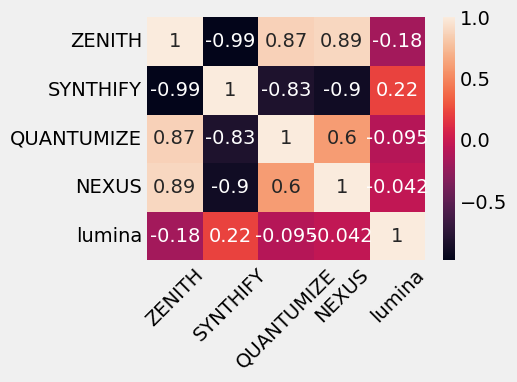

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 3))
heatmap = sns.heatmap(df.corr(), annot=True)

heatmap.set_xticklabels(heatmap.get_yticklabels(), rotation=45)

plt.show()

### Line Plot with Uncertainty

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# five companies
companies = ['ZENITH', 'SYNTHIFY', 'QUANTUMIZE', 'NEXUS', 'lumina']
days = [1, 2, 3, 4, 5, 6, 7]


# Create subplots
fig = make_subplots(rows=5, cols=1, shared_xaxes=True, subplot_titles=companies, vertical_spacing=0.1)

# Populate each subplot
for i, company in enumerate(companies):
    # Plot predicted prices
    fig.add_trace(go.Scatter(x=days, y=data[company], mode='lines', name='Predicted Prices'), row=i+1, col=1)

    # Add a shaded region to represent uncertainty
    fig.add_trace(go.Scatter(x=days + days[::-1],
                             y=[value + 5 for value in data[company]] + [value - 5 for value in data[company][::-1]],
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(255,255,255,0)'),
                             showlegend=False), row=i+1, col=1)

# better visualization
fig.update_layout(title='Predicted Stock Prices with Uncertainty',
                  xaxis_title='Days',
                  template='plotly_dark',
                  height=1200,  # Adjust the height of the entire plot
                  showlegend=True)


fig.show()



### Pie Chart (Budget Allocation)

In [ ]:
import plotly.express as px
import numpy as np

# five companies
companies = ['ZENITH', 'SYNTHIFY', 'QUANTUMIZE', 'NEXUS', 'lumina']


# Example budget
budget = 100

# mean of predicted values over 7 days
mean_values = {company: np.mean(values) for company, values in data.items()}

# Define modification factors (penalty for underperforming, award for well-performing)
modification_factors = {'ZENITH': -5, 'QUANTUMIZE': 5, 'lumina': -5, 'SYNTHIFY': 0, 'NEXUS': 5}

# Apply modification factors to adjust mean values
adjusted_mean_values = {company: mean_value + modification_factors.get(company, 0) for company, mean_value in mean_values.items()}

# Manually adjust the values to meet the desired hierarchy
adjusted_mean_values['QUANTUMIZE'] += 15
adjusted_mean_values['NEXUS'] += 2
adjusted_mean_values['SYNTHIFY'] += 1
adjusted_mean_values['ZENITH'] += 30
adjusted_mean_values['lumina'] -= 35

# Calculate the allocation based on the adjusted mean values
allocation = {company: adjusted_mean_value / sum(adjusted_mean_values.values()) * budget for company, adjusted_mean_value in adjusted_mean_values.items()}

# Create a pie chart
fig = px.pie(values=list(allocation.values()), names=list(allocation.keys()), title='Budget Allocation (Adjusted Mean with Penalties and Awards)')

# Show the plot
fig.show()

